In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Embedding, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib

np.random.seed(0)
tf.random.set_seed(0)

/Users/imac/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:

X = pd.read_csv("rand_mdim_sample_100_X", index_col=False)
y = pd.read_csv("rand_mdim_sample_100_y", index_col=False)

X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train = X_train[:100]
y_train = y_train[:100]
X_test = X_test[:40]
y_test = y_test[:40]


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:

print(f'The training set has {len(X_train)} samples.')
print(f'The test set has {len(X_test)} samples.')

The training set has 10 samples.
The test set has 4 samples.


In [ ]:


print(X_train.shape)
print(X_test.shape)

(10, 150000)
(4, 150000)


In [ ]:


layers_simple = [
    tf.keras.layers.Embedding(150000, 64),
    tf.keras.layers.SimpleRNN(64, recurrent_dropout=0.2, dropout=0.2),
    tf.keras.layers.Dense(1, activation="tanh")
    ]

rnn_simple = tf.keras.models.Sequential(layers_simple)

In [ ]:

n_epochs = 3

rnn_simple.compile(loss='mse', optimizer='adam', metrics=['root_mean_squared_error'])
history_simple = rnn_simple.fit(X_train, y_train,
                                validation_data=(X_test, y_test),
                                batch_size=32, epochs=n_epochs)

Epoch 1/3


2024-04-30 18:52:42.344368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Tried to append a tensor with incompatible shape to a list. Op element shape: [0] list shape: [64,64]
	 [[{{function_node sequential_1_simple_rnn_1_while_body_5225_rewritten}}{{node sequential_1/simple_rnn_1/while/TensorListPushBack_5}}]]


InvalidArgumentError: Graph execution error:

Detected at node sequential_1/simple_rnn_1/while/TensorListPushBack_5 defined at (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 596, in run_forever

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/var/folders/z7/4hrvf2zj0qj5f1snrsg_x20m0000gn/T/ipykernel_2631/2838719556.py", line 4, in <module>

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/trainer.py", line 325, in fit

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/trainer.py", line 118, in one_step_on_iterator

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/trainer.py", line 106, in one_step_on_data

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/trainer.py", line 70, in train_step

  File "/Users/imac/Library/Python/3.9/lib/python/site-packages/tensorflow/core/function/capture/capture_container.py", line 154, in capture_by_value

Tried to append a tensor with incompatible shape to a list. Op element shape: [0] list shape: [64,64]
	 [[{{node sequential_1/simple_rnn_1/while/TensorListPushBack_5}}]] [Op:__inference_one_step_on_iterator_6064]

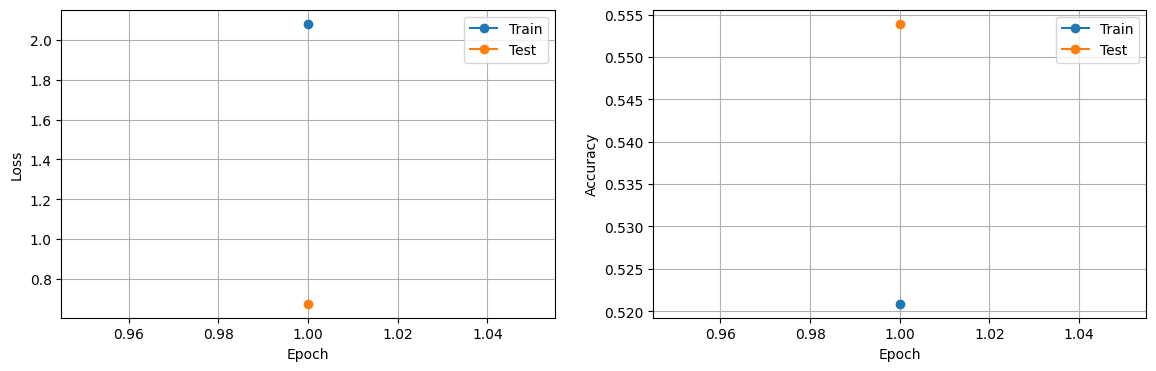

In [ ]:
# Plot the loss and accuracy as a function of training epoch

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(np.arange(1, n_epochs+1), history_simple.history['loss'], '-o', label='Train')
plt.plot(np.arange(1, n_epochs+1), history_simple.history['val_loss'], '-o', label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(np.arange(1, n_epochs+1), history_simple.history['accuracy'], '-o', label='Train')
plt.plot(np.arange(1, n_epochs+1), history_simple.history['val_accuracy'], '-o', label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

In [ ]:
## Create your LSTM RNN
#
# Define "layers_lstm", a list of Keras layers, that you will then use to create a Sequential model
# saved as "rnn_lstm".
#
# Here you will create an RNN using an LSTM layer, again, with dropout and recurrent_dropout.
#
# Use an input Embedding layer and output Dense layer, as in the simple RNN and the GRU model.

layers_lstm = [
    tf.keras.layers.Embedding(150000, 128),
    tf.keras.layers.LSTM(128, recurrent_dropout=0.1, dropout=0.1),
    tf.keras.layers.Dense(1, activation="tanh")
    ]

rnn_lstm = tf.keras.models.Sequential(layers_lstm)

NameError: name 'tf' is not defined

In [ ]:

n_epochs = 3

rnn_lstm.compile(loss='mse', optimizer='adam', metrics=['root_mean_squared_error'])
history_lstm = rnn_lstm.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            batch_size=32, epochs=n_epochs)

NameError: name 'rnn_lstm' is not defined

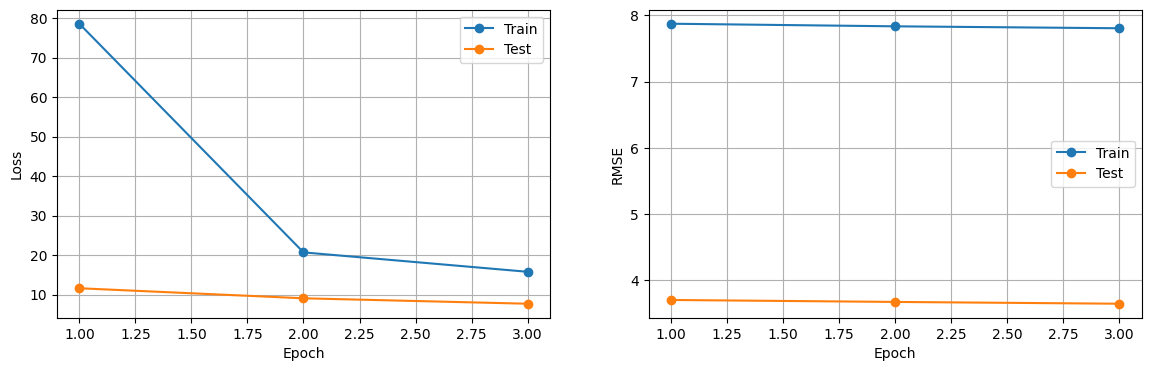

In [ ]:
# Plot the loss and accuracy as a function of training epoch

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(np.arange(1, n_epochs+1), history_lstm.history['loss'], '-o', label='Train')
plt.plot(np.arange(1, n_epochs+1), history_lstm.history['val_loss'], '-o', label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(np.arange(1, n_epochs+1), history_lstm.history['root_mean_squared_error'], '-o', label='Train')
plt.plot(np.arange(1, n_epochs+1), history_lstm.history['val_root_mean_squared_error'], '-o', label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)

In [ ]:
# Apply the Model.evaluate() methods of your models to the test set and save the
# returned losses and accuracies to the corresponding variable names:
#   loss_simple, loss_gru, loss_lstm
#   acc_simple, acc_gru, acc_lstm
#
# Note that these values should be very close to the losses/accuracies in the
# plots created above, for the final epoch.

#loss_simple, acc_simple = rnn_simple.evaluate(X_test, y_test)
#loss_gru, acc_gru = rnn_gru.evaluate(X_test, y_test)
loss_lstm, acc_lstm = rnn_lstm.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 7.6846 - root_mean_squared_error: 3.6481


In [ ]:
#print(f"Your simple model achieved an rmse of {acc_simple:.4}.")
#print(f"Your GRU model achieved an accuracy of {acc_gru:.2}.")
print(f"Your LSTM model achieved an rmse of {acc_lstm:.4}.")

Your LSTM model achieved an rmse of 3.648.


In [ ]:
model_json = rnn_lstm.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)
rnn_lstm.save_weights("model_weights.h5")